# **⭐Synthetic Customer Recommendation System using Generative AI⭐**

## **✅Objective**

To build a personalized product recommendation system using content-based filtering and enhance model performance by generating synthetic customer profiles with Generative AI.

## **🔖Dataset**

File: data.csv
Synthetic File: syn_customers.csv

## **📤Target Output**

A function that recommends products based on a customer's interests:

recommend_products(customer_id)


The model is evaluated before and after adding synthetic customers to measure improvement.

## **⚡Model Used**
* Customer segmentation based Recommendation System (KMeans)
* Content-Based Recommendation System (TF-IDF Vectorizer)
* Category-Based Recommendation system(TF-IDFVec. & Cosine similarity)


### **✍Creators:**
* ***Krishna Chaudhari*** (Data + Synthetic Generation Lead)
* ***Shireen Khan*** (Recommendation System + Evaluation Lead)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/MyDrive/GNCIPL-AIML/Week-6/data.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


# ✅Section A - INITIALIZATION
## **By: Krishna Chaudhari**✍
### Data Preparation & Synthetic Customer Generation⭐


In [ ]:
# Create working copy
df_copy = df.copy()

# Basic overview
print("Dataset Shape:", df_copy.shape)
df_copy.head()
df_copy.info()
df_copy.describe(include='all')
df_copy.isnull().sum()

Dataset Shape: (1000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Invoice            1000 non-null   int64  
 1   ProductID          1000 non-null   int64  
 2   Product            1000 non-null   object 
 3   QuantityBought     1000 non-null   int64  
 4   Date               1000 non-null   object 
 5   Price              1000 non-null   float64
 6   CustomerID         1000 non-null   int64  
 7   Age                1000 non-null   int64  
 8   Gender             1000 non-null   object 
 9   AverageSpend       1000 non-null   float64
 10  PurchaseFrequency  1000 non-null   object 
 11  Country            1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


,0
Invoice,0
ProductID,0
Product,0
QuantityBought,0
Date,0
Price,0
CustomerID,0
Age,0
Gender,0
AverageSpend,0


## ✅ **PHASE 2 - DATA CLEANING & PREPARATION**

In [ ]:
# 1. Remove missing CustomerID values (if any)
df_copy = df_copy.dropna(subset=['CustomerID'])

# 2. Remove invalid or negative quantities
df_copy = df_copy[df_copy['QuantityBought'] > 0]

# 3. Convert Date column to datetime format
df_copy['Date'] = pd.to_datetime(df_copy['Date'], errors='coerce')

# 4. Remove rows with invalid dates
df_copy = df_copy.dropna(subset=['Date'])

# 5. Ensure Price and AverageSpend are numeric
df_copy['Price'] = pd.to_numeric(df_copy['Price'], errors='coerce')
df_copy['AverageSpend'] = pd.to_numeric(df_copy['AverageSpend'], errors='coerce')

# 6. Remove rows with missing numeric values after conversion
df_copy = df_copy.dropna(subset=['Price', 'AverageSpend'])

# 7. Reset index after cleaning
df_copy = df_copy.reset_index(drop=True)

# Print updated dataset info
print("After Cleaning Shape:", df_copy.shape)
df_copy.info()
df_copy.isnull().sum()
df_copy.head()

After Cleaning Shape: (1000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Invoice            1000 non-null   int64         
 1   ProductID          1000 non-null   int64         
 2   Product            1000 non-null   object        
 3   QuantityBought     1000 non-null   int64         
 4   Date               1000 non-null   datetime64[ns]
 5   Price              1000 non-null   float64       
 6   CustomerID         1000 non-null   int64         
 7   Age                1000 non-null   int64         
 8   Gender             1000 non-null   object        
 9   AverageSpend       1000 non-null   float64       
 10  PurchaseFrequency  1000 non-null   object        
 11  Country            1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 93.9+ KB


,Invoice,ProductID,Product,QuantityBought,Date,Price,CustomerID,Age,Gender,AverageSpend,PurchaseFrequency,Country
0,221958,3180,Wall Clock,4,2021-01-01 00:00:00,34.04,81117,29,Female,97.34,High,United Kingdom
1,771155,5892,Ceramic Mug,6,2021-01-01 01:00:00,94.43,71158,33,Male,273.44,High,USA
2,231932,8043,Ceramic Mug,3,2021-01-01 02:00:00,112.72,44782,58,Male,128.34,High,Canada
3,465838,1137,Ceramic Mug,6,2021-01-01 03:00:00,112.00,95709,49,Female,214.24,High,United Kingdom
4,359178,7327,Desk Organizer,2,2021-01-01 04:00:00,80.61,88533,32,Male,178.90,Low,USA


## **Insight**:

dataset is fully clean — all 1000 rows remain, which means no missing or invalid values were found during cleaning.

The Date column converted correctly into datetime64, and all key numeric fields (Price, AverageSpend, QuantityBought) are valid, so the dataset is ready for EDA.

## ✅ **PHASE 3 — EDA**

### 1. Top 10 Most Purchased Products (Bar Chart)⭐

In [ ]:
import plotly.express as px

top_products = df_copy['Product'].value_counts().head(10)
fig = px.bar(
    top_products,
    title='Top 10 Most Purchased Products',
    labels={'value': 'Purchase Count', 'index': 'Product'},
    color=top_products.values,
    color_continuous_scale='Blues'
)
fig.update_layout(showlegend=False)
fig.show()

**Insight**:

*'Wireless Mouse'*, *'Notebook'*, and *'Desk Organizer'* are the most frequently purchased items, indicating strong demand for tech and office-related products.

The top 10 products show a balanced purchase distribution, suggesting no heavy skew toward a single product category.

### **2. Distribution of Quantity Bought (Histogram)**⭐

In [ ]:
import plotly.express as px

fig = px.histogram(
    df_copy,
    x='QuantityBought',
    nbins=20,
    title='Distribution of Quantity Bought',
    labels={'QuantityBought': 'Quantity Bought'},
    color_discrete_sequence=['#1f77b4']
)
fig.show()

**Insight:**

• Most customers tend to buy between 1 to 6 units per order, suggesting a preference for smaller, frequent purchases rather than bulk buying.

• The distribution is relatively balanced across quantities, indicating no extreme skew in purchasing volume.

### **3 – Price Distribution (Box Plot)**⭐

In [ ]:
# Block 3 – Price Distribution (Box Plot)
import plotly.express as px

fig = px.box(
    df_copy,
    y='Price',
    title='Price Distribution',
    labels={'Price': 'Product Price'},
    color_discrete_sequence=['#2ca02c']
)
fig.show()

Insight:

• Most product prices fall between roughly 40 and 115, with a median around 76, indicating a mid-range pricing tendency.

• A few high-priced items stretch the upper range, but there are no extreme outliers, showing stable pricing across products.

### **4 – Gender Distribution (Pie Chart)**⭐

In [ ]:
# Block 4 – Gender Distribution (Pie Chart)
import plotly.express as px

gender_counts = df_copy['Gender'].value_counts()

fig = px.pie(
    names=gender_counts.index,
    values=gender_counts.values,
    title='Gender Distribution',
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig.show()

**Insight:**

• The gender distribution is fairly balanced, with males slightly higher at around 56%, indicating a near-even representation of customer demographics.

• Such balanced proportions help ensure that recommendations remain unbiased across gender groups.

### **5 – Age Distribution (Histogram)**⭐

In [ ]:
# Block 5 – Age Distribution (Histogram)
import plotly.express as px

fig = px.histogram(
    df_copy,
    x='Age',
    nbins=20,
    title='Age Distribution',
    labels={'Age': 'Customer Age'},
    color_discrete_sequence=['#9467bd']
)
fig.show()

**Insight:**

• The age distribution shows customers spread fairly evenly across ages 20 to 55, indicating a well-diversified demographic range.

• Slight peaks around the late 20s to early 30s suggest that young adults form a strong portion of the customer base.

### **6 – Purchase Frequency Distribution (Bar Chart)**⭐

In [ ]:
# Block 6 – Purchase Frequency Distribution (Bar Chart)
import plotly.express as px

freq_counts = df_copy['PurchaseFrequency'].value_counts()
fig = px.bar(
    freq_counts,
    title='Purchase Frequency Distribution',
    labels={'index': 'Purchase Frequency', 'value': 'Count'},
    color=freq_counts.values,
    color_continuous_scale='Teal'
)
fig.update_layout(showlegend=False)
fig.show()

**Insight:**

• Customers with High purchase frequency form the largest group, indicating many users shop regularly rather than occasionally.

• The clear drop from High → Medium → Low suggests a strong core of active buyers, which is valuable for generating stable recommendations.

###  **7 – Country Distribution (Bar Chart)**⭐

In [ ]:
# Block 7 – Country Distribution (Bar Chart)
import plotly.express as px

country_counts = df_copy['Country'].value_counts()

fig = px.bar(
    country_counts,
    title='Country Distribution',
    labels={'index': 'Country', 'value': 'Count'},
    color=country_counts.values,
    color_continuous_scale='Viridis'
)
fig.update_layout(showlegend=False)
fig.show()

Insight:

• Australia contributes the highest number of customers, accounting for roughly half the dataset, making it the dominant market segment.

• The United Kingdom and Canada show similar customer counts, while the USA has the smallest share, indicating a more limited presence.

### **8 – Correlation Heatmap (Numeric Features)**⭐

In [ ]:
# Block 8 – Correlation Heatmap (Numeric Features)
import plotly.express as px
import pandas as pd

# Select only numeric columns
numeric_cols = df_copy.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_cols.corr()

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    title='Correlation Heatmap of Numeric Features',
    color_continuous_scale='RdBu_r'
)
fig.show()

Insight:

• AverageSpend shows a strong positive correlation with Price, meaning higher-priced items naturally lead to higher spending values.

• All other features show very weak or near-zero correlations, indicating they behave largely independently and won’t introduce multicollinearity issues.

## ✅ **PHASE 4 — CATEGORY EXTRACTION (Product Categorization)**

In [ ]:
# Block 1 – Product Category Extraction
def map_category(product):
    product = product.lower()

    if "mouse" in product or "speaker" in product:
        return "Electronics"
    elif "light" in product or "lamp" in product:
        return "Lighting / Decor"
    elif "mug" in product or "bottle" in product:
        return "Kitchen"
    elif "organizer" in product or "notebook" in product:
        return "Office"
    elif "clock" in product:
        return "Home Decor"
    elif "storage" in product or "box" in product:
        return "Storage"
    else:
        return "Others"

df_copy["Category"] = df_copy["Product"].apply(map_category)
df_copy[["Product", "Category"]].head(10)

,Product,Category
0,Wall Clock,Home Decor
1,Ceramic Mug,Kitchen
2,Ceramic Mug,Kitchen
3,Ceramic Mug,Kitchen
4,Desk Organizer,Office
5,Home Decor Lamp,Lighting / Decor
6,Storage Box,Storage
7,Desk Organizer,Office
8,Bluetooth Speaker,Electronics
9,Storage Box,Storage


In [ ]:
df_copy['Product'].unique()

array(['Wall Clock', 'Ceramic Mug', 'Desk Organizer', 'Home Decor Lamp',
       'Storage Box', 'Bluetooth Speaker', 'LED Light Strip', 'Notebook',
       'Wireless Mouse', 'Water Bottle'], dtype=object)

Insight:

• Products appear repeatedly because each row represents an individual purchase, not a unique product item.

• These repetitions help capture real buying patterns, which are essential for both EDA and the recommendation model.

### **Category Distribution (Bar Chart)**⭐

In [ ]:
# Category Distribution (Bar Chart)
import plotly.express as px

category_counts = df_copy['Category'].value_counts()
fig = px.bar(
    category_counts,
    title='Category Distribution',
    labels={'index': 'Category', 'value': 'Purchases Done'},
    color=category_counts.values,
    color_continuous_scale='Plasma'
)
fig.update_layout(showlegend=False)
fig.show()

Insight:

• Electronics and Office categories dominate the dataset, indicating these product types are purchased most frequently by customers.

• Storage and Home Decor have notably lower counts, suggesting they form smaller but still meaningful niche segments.

## ✅**PHASE 5 — SYNTHETIC CUSTOMER GENERATION**

In [ ]:
# Prepare Base Customer Table (Unique Customers)
import pandas as pd
import numpy as np

# Create unique customer table for reference
customer_base = df_copy.groupby('CustomerID').agg({
    'Age': 'first',
    'Gender': 'first',
    'AverageSpend': 'mean',
    'PurchaseFrequency': 'first',
    'Country': 'first'
}).reset_index()

customer_base.head()

,CustomerID,Age,Gender,AverageSpend,PurchaseFrequency,Country
0,10060,44,Male,266.82,High,Canada
1,10066,35,Female,51.52,High,Australia
2,10178,59,Male,71.86,Medium,Australia
3,10215,56,Male,256.83,Medium,Australia
4,10228,48,Female,29.67,Low,Canada


Insight:

• Each customer is now represented only once, giving us a clean base table for generating synthetic customer profiles.

• The attributes (Age, Gender, Spend, Frequency, Country) are preserved accurately, ensuring synthetic data can follow the same structure.

### ✅**Generate Synthetic Customers (200 Rows)**

In [ ]:
# Generate Synthetic Customers (200 Rows)
import numpy as np
import pandas as pd

# Number of synthetic customers
num_syn = 200

# Generate synthetic customer IDs beyond the existing max ID
start_id = customer_base['CustomerID'].max() + 1
synthetic_ids = np.arange(start_id, start_id + num_syn)

# Generate synthetic attributes
syn_age = np.random.randint(18, 60, size=num_syn)
syn_gender = np.random.choice(['Male', 'Female'], size=num_syn, p=[0.55, 0.45])
syn_avg_spend = np.round(np.random.uniform(20, 300, size=num_syn), 2)
syn_frequency = np.random.choice(['Low', 'Medium', 'High'], size=num_syn, p=[0.2, 0.5, 0.3])
syn_country = np.random.choice(['Australia', 'United Kingdom', 'Canada', 'USA'], size=num_syn, p=[0.5, 0.2, 0.2, 0.1])

# Create synthetic dataframe
synthetic_customers = pd.DataFrame({
    'CustomerID': synthetic_ids,
    'Age': syn_age,
    'Gender': syn_gender,
    'AverageSpend': syn_avg_spend,
    'PurchaseFrequency': syn_frequency,
    'Country': syn_country
})

synthetic_customers.head()

,CustomerID,Age,Gender,AverageSpend,PurchaseFrequency,Country
0,99963,45,Male,231.12,Medium,Australia
1,99964,46,Female,201.87,Medium,Australia
2,99965,29,Female,155.57,Medium,United Kingdom
3,99966,25,Female,165.03,High,Australia
4,99967,34,Male,175.31,Low,Australia


Insight:

• Your synthetic customers were generated successfully, and the first few rows show realistic variations in Age, Spend, Gender, Frequency, and Country.

• With 200 synthetic profiles added, your enhanced dataset will now offer richer demographic and behavioral diversity for comparative EDA.

### ✅**Merge real and synthetic customers**

In [ ]:
# Merge real and synthetic customers
combined_customers = pd.concat([customer_base, synthetic_customers], ignore_index=True)

combined_customers.shape, combined_customers.head()

((1194, 6),
    CustomerID  Age  Gender  AverageSpend PurchaseFrequency    Country
 0       10060   44    Male        266.82              High     Canada
 1       10066   35  Female         51.52              High  Australia
 2       10178   59    Male         71.86            Medium  Australia
 3       10215   56    Male        256.83            Medium  Australia
 4       10228   48  Female         29.67               Low     Canada)

Insight:

• The combined customer dataset now contains 1194 customers, meaning your synthetic customers were successfully appended to the real ones.

• This enhanced dataset is now ready for Base vs Base+Synthetic comparative EDA, giving a richer population for analysis.

## ✅**Phase 6 – Comparative EDA**

Merge Transactions With Customer Details

In [ ]:
# Merge base transactions with only real customers
base_merged = df_copy.merge(customer_base, on='CustomerID', how='left')

# Merge transactions with combined (real + synthetic) customers
enhanced_merged = df_copy.merge(combined_customers, on='CustomerID', how='left')

# Show shapes for verification
base_merged.shape, enhanced_merged.shape

((1000, 18), (1000, 18))

## **Age Distribution Comparison**⭐

In [ ]:
# Plot 1 – Age Distribution Comparison (Base vs Enhanced)
import plotly.express as px
import pandas as pd

# Extract ages
base_age = customer_base['Age']
enhanced_age = combined_customers['Age']

# Create comparison dataframe
age_df = pd.DataFrame({
    'Age': pd.concat([base_age, enhanced_age], ignore_index=True),
    'Dataset': ['Base'] * len(base_age) + ['Enhanced'] * len(enhanced_age)
})

fig = px.histogram(
    age_df,
    x='Age',
    color='Dataset',
    nbins=20,
    barmode='overlay',
    opacity=0.6,
    title='Age Distribution: Base vs Enhanced Dataset'
)

fig.show()

Insight:

• The enhanced dataset shows a slightly more balanced age spread because the 200 synthetic customers introduce additional variation across age groups.

• This expansion reduces bias toward certain age ranges and gives a more complete representation of potential customer demographics.

### **Gender Distribution Comparison**⭐

In [ ]:
# Plot 2 – Gender Distribution Comparison (Bar Chart)
import plotly.express as px
import pandas as pd

# Gender counts
base_gender = customer_base['Gender'].value_counts()
enhanced_gender = combined_customers['Gender'].value_counts()

# Create comparison dataframe
gender_df = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Base': [base_gender.get('Male', 0), base_gender.get('Female', 0)],
    'Enhanced': [enhanced_gender.get('Male', 0), enhanced_gender.get('Female', 0)]
})
# Melt for plotting
gender_melted = gender_df.melt(id_vars='Gender', var_name='Dataset', value_name='Count')

fig = px.bar(
    gender_melted,
    x='Gender',
    y='Count',
    color='Dataset',
    barmode='group',
    title='Gender Distribution: Base vs Enhanced Dataset'
)
fig.show()

Insight:

• The enhanced dataset shows an increased count for both genders because synthetic customers were added, but the gender ratio remains similar, preserving dataset balance.

• This consistency indicates that synthetic data did not introduce gender bias, maintaining the integrity of demographic distribution.

### **Purchase Frequency Comparison**⭐

In [ ]:
# Plot 3 – Purchase Frequency Comparison (Bar Chart)
import plotly.express as px
import pandas as pd

# Frequency counts
base_freq = customer_base['PurchaseFrequency'].value_counts()
enhanced_freq = combined_customers['PurchaseFrequency'].value_counts()

# Create comparison dataframe
freq_df = pd.DataFrame({
    'PurchaseFrequency': ['Low', 'Medium', 'High'],
    'Base': [
        base_freq.get('Low', 0),
        base_freq.get('Medium', 0),
        base_freq.get('High', 0)
    ],
    'Enhanced': [
        enhanced_freq.get('Low', 0),
        enhanced_freq.get('Medium', 0),
        enhanced_freq.get('High', 0)
    ]
})
# Melt for plotting
freq_melted = freq_df.melt(id_vars='PurchaseFrequency', var_name='Dataset', value_name='Count')

fig = px.bar(
    freq_melted,
    x='PurchaseFrequency',
    y='Count',
    color='Dataset',
    barmode='group',
    title='Purchase Frequency Distribution: Base vs Enhanced Dataset'
)
fig.show()

Insight:

• The enhanced dataset shows higher counts across all frequency levels because synthetic customers were added, with the biggest increase in Medium and High categories.

• This creates a more balanced and realistic distribution of shopping behavior, reducing bias toward occasional buyers.

### **Country Distribution Comparison**⭐

In [ ]:
# Plot 4 – Country Distribution Comparison (Bar Chart)
import plotly.express as px
import pandas as pd

# Country counts
base_country = customer_base['Country'].value_counts()
enhanced_country = combined_customers['Country'].value_counts()

# Create comparison dataframe
country_df = pd.DataFrame({
    'Country': ['Australia', 'United Kingdom', 'Canada', 'USA'],
    'Base': [
        base_country.get('Australia', 0),
        base_country.get('United Kingdom', 0),
        base_country.get('Canada', 0),
        base_country.get('USA', 0)
    ],
    'Enhanced': [
        enhanced_country.get('Australia', 0),
        enhanced_country.get('United Kingdom', 0),
        enhanced_country.get('Canada', 0),
        enhanced_country.get('USA', 0)
    ]
})
# Melt for plotting
country_melted = country_df.melt(id_vars='Country', var_name='Dataset', value_name='Count')
fig = px.bar(
    country_melted,
    x='Country',
    y='Count',
    color='Dataset',
    barmode='group',
    title='Country Distribution: Base vs Enhanced Dataset'
)
fig.show()

Insight:

• The enhanced dataset increases customer counts across all countries while preserving the original distribution pattern, with Australia remaining the dominant region.

• This expansion strengthens geographic diversity without distorting the natural proportions seen in the base data.

### **Average Spend Distribution Comparison**⭐

In [ ]:
# Plot 5 – Average Spend Distribution Comparison (Box Plot)
import plotly.express as px
import pandas as pd

# Extract spend values
base_spend = customer_base['AverageSpend']
enhanced_spend = combined_customers['AverageSpend']

# Create comparison dataframe
spend_df = pd.DataFrame({
    'AverageSpend': pd.concat([base_spend, enhanced_spend], ignore_index=True),
    'Dataset': ['Base'] * len(base_spend) + ['Enhanced'] * len(enhanced_spend)
})
fig = px.box(
    spend_df,
    x='Dataset',
    y='AverageSpend',
    color='Dataset',
    title='Average Spend Distribution: Base vs Enhanced Dataset'
)
fig.show()

Insight:

• The enhanced dataset maintains a distribution very similar to the base dataset but becomes slightly smoother due to the additional synthetic customers, reducing sharp gaps or spikes.

• The median and IQR remain consistent, showing that synthetic profiles did not distort spending behavior and kept it realistic.

###**Correlation Heatmap Comparison**⭐

In [ ]:
# Plot 6 – Correlation Heatmap Comparison (Base vs Enhanced)
import plotly.express as px
import pandas as pd

# Select only numeric columns
base_corr = base_merged.select_dtypes(include=['int64', 'float64']).corr()
enh_corr = enhanced_merged.select_dtypes(include=['int64', 'float64']).corr()

# Base heatmap
fig1 = px.imshow(
    base_corr,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Correlation Heatmap – Base Dataset'
)
fig1.show()

# Enhanced heatmap
fig2 = px.imshow(
    enh_corr,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Correlation Heatmap – Enhanced Dataset (with Synthetic Customers)'
)
fig2.show()

Insight:

Both datasets show very similar correlation patterns, meaning synthetic customer data did not distort the natural relationships between features.

The enhanced dataset simply adds more variance and smoothness, helping stabilize weak correlations without introducing new unwanted patterns.

## ✅ **Download Enhanced Dataset ready for modeling**

In [ ]:
enhanced_merged.to_csv("enhanced_dataset.csv", index=False)

from google.colab import files
files.download("enhanced_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Old products
old_products = pd.DataFrame({
    "Product": [
        "Wall Clock", "Ceramic Mug", "Desk Organizer", "Home Decor Lamp",
        "Storage Box", "Bluetooth Speaker", "LED Light Strip", "Notebook",
        "Wireless Mouse", "Water Bottle"
    ],
    "Category": [
        "Home Decor", "Kitchen", "Office", "Lighting / Decor",
        "Storage", "Electronics", "Lighting / Decor", "Office",
        "Electronics", "Kitchen"
    ],
    "Description": [
        "A minimalist wall clock with a silent sweep mechanism, perfect for modern décor.",
        "A durable ceramic mug with a smooth matte finish for hot beverages.",
        "A multi-section organizer that keeps workspace essentials neatly arranged.",
        "A warm ambient lamp with soft diffused lighting for home décor.",
        "A sturdy plastic storage box ideal for organizing household items.",
        "A portable Bluetooth speaker with clear sound and deep bass.",
        "A flexible RGB LED strip with multiple color modes for room decoration.",
        "A premium ruled notebook for writing, journaling, or office notes.",
        "A lightweight wireless mouse with ergonomic design and smooth tracking.",
        "A BPA-free reusable bottle designed to keep drinks cold for hours."
    ]
})

# New products (15)
new_products = pd.DataFrame({
    "Product": [
        "Fragrance Oil Diffuser", "Geometric Wall Shelf", "Decorative Hourglass Timer",
        "Silicone Baking Mat Set", "Digital Kitchen Scale", "Reusable Metal Straw Kit",
        "Wireless Number Pad", "Blue-Light Blocking Glasses", "Rotating Desk Pen Holder",
        "Solar Garden Fairy Lights", "Motion Sensor Night Light", "Color-Changing Aroma Lamp",
        "Hanging Closet Organizer", "Under-Bed Storage Bag", "Portable Power Bank (10,000 mAh)"
    ],
    "Category": [
        "Home Decor", "Home Decor", "Home Decor",
        "Kitchen", "Kitchen", "Kitchen",
        "Office", "Office", "Office",
        "Lighting / Decor", "Lighting / Decor", "Lighting / Decor",
        "Storage", "Storage", "Electronics"
    ],
    "Description": [
        "A ceramic diffuser that releases aromatherapy mist for a calming atmosphere.",
        "A hexagonal metal-and-wood shelf ideal for displaying décor items.",
        "A handcrafted glass hourglass filled with fine sand for elegant décor.",
        "Reusable non-stick baking mats for even heat distribution while baking.",
        "A precision stainless-steel scale ideal for accurate ingredient measurement.",
        "A stainless-steel straw kit with a travel pouch and cleaning brush.",
        "A compact Bluetooth numeric keypad designed for fast data entry.",
        "Lightweight glasses that filter blue light and reduce eye strain.",
        "A rotating organizer with compartments for pens and office supplies.",
        "Solar-powered LED lights perfect for garden and balcony ambience.",
        "An energy-efficient night light that activates automatically on motion.",
        "A fragrance lamp that shifts between soothing colors while diffusing aroma.",
        "A multi-tier fabric organizer that maximizes vertical closet space.",
        "A large zippered bag for storing linens or clothes under the bed.",
        "A slim, fast-charging power bank with dual USB output for daily use."
    ]
})

product_catalogue = pd.concat([old_products, new_products], ignore_index=True)
product_catalogue


,Product,Category,Description
0,Wall Clock,Home Decor,A minimalist wall clock with a silent sweep me...
1,Ceramic Mug,Kitchen,A durable ceramic mug with a smooth matte fini...
2,Desk Organizer,Office,A multi-section organizer that keeps workspace...
3,Home Decor Lamp,Lighting / Decor,A warm ambient lamp with soft diffused lightin...
4,Storage Box,Storage,A sturdy plastic storage box ideal for organiz...
5,Bluetooth Speaker,Electronics,A portable Bluetooth speaker with clear sound ...
6,LED Light Strip,Lighting / Decor,A flexible RGB LED strip with multiple color m...
7,Notebook,Office,"A premium ruled notebook for writing, journali..."
8,Wireless Mouse,Electronics,A lightweight wireless mouse with ergonomic de...
9,Water Bottle,Kitchen,A BPA-free reusable bottle designed to keep dr...


In [ ]:
import numpy as np

# 1. List of new products only
new_product_names = new_products['Product'].tolist()

# 2. Pick some existing customers to assign these purchases to
existing_customers = df_copy['CustomerID'].unique()
num_rows = 150  # number of synthetic transactions you want

syn_customers = np.random.choice(existing_customers, size=num_rows, replace=True)
syn_products = np.random.choice(new_product_names, size=num_rows, replace=True)

# 3. Map product -> category & (optional) price
# For price, we can just set a random reasonable value or use a dict
price_map = {p: np.random.uniform(5, 50) for p in new_product_names}
category_map = dict(zip(product_catalogue['Product'], product_catalogue['Category']))

# 4. Generate other fields
start_invoice = df_copy['Invoice'].max() + 1
syn_invoices = np.arange(start_invoice, start_invoice + num_rows)

syn_quantity = np.random.randint(1, 5, size=num_rows)

date_min = df_copy['Date'].min()
date_max = df_copy['Date'].max()
date_range = pd.date_range(start=date_min, end=date_max, periods=num_rows)
syn_dates = np.random.choice(date_range, size=num_rows, replace=False)

# 5. Build synthetic transaction dataframe (only base fields for now)
syn_trans = pd.DataFrame({
    "Invoice": syn_invoices,
    "ProductID": np.random.randint(10000, 99999, size=num_rows),
    "Product": syn_products,
    "QuantityBought": syn_quantity,
    "Date": syn_dates,
    "Price": [price_map[p] for p in syn_products],
    "CustomerID": syn_customers
})

# 6. Add Category using product_catalogue
syn_trans["Category"] = syn_trans["Product"].map(category_map)

syn_trans.head()


,Invoice,ProductID,Product,QuantityBought,Date,Price,CustomerID,Category
0,999685,74668,Color-Changing Aroma Lamp,2,2021-02-03 12:33:49.530201342,45.209352,28690,Lighting / Decor
1,999686,74442,Digital Kitchen Scale,1,2021-02-01 00:13:17.315436241,48.748530,38756,Kitchen
2,999687,60712,Solar Garden Fairy Lights,1,2021-02-05 04:47:31.006711409,8.153944,36957,Lighting / Decor
3,999688,97379,"Portable Power Bank (10,000 mAh)",4,2021-02-07 03:43:29.395973154,48.264413,81916,Electronics
4,999689,31522,"Portable Power Bank (10,000 mAh)",1,2021-01-11 14:46:42.684563758,48.264413,81042,Electronics


In [ ]:
# Build customer attribute map from existing data
cust_attrs = df_copy.groupby('CustomerID')[['Age', 'Gender', 'AverageSpend', 'PurchaseFrequency', 'Country']].first()

# Join attributes into synthetic transactions
syn_trans = syn_trans.merge(cust_attrs, on='CustomerID', how='left')

syn_trans.head()


,Invoice,ProductID,Product,QuantityBought,Date,Price,CustomerID,Category,Age,Gender,AverageSpend,PurchaseFrequency,Country
0,999685,74668,Color-Changing Aroma Lamp,2,2021-02-03 12:33:49.530201342,45.209352,28690,Lighting / Decor,59,Male,28.24,High,Australia
1,999686,74442,Digital Kitchen Scale,1,2021-02-01 00:13:17.315436241,48.748530,38756,Kitchen,32,Male,91.02,Low,Australia
2,999687,60712,Solar Garden Fairy Lights,1,2021-02-05 04:47:31.006711409,8.153944,36957,Lighting / Decor,29,Female,268.71,High,Canada
3,999688,97379,"Portable Power Bank (10,000 mAh)",4,2021-02-07 03:43:29.395973154,48.264413,81916,Electronics,47,Male,79.62,Low,United Kingdom
4,999689,31522,"Portable Power Bank (10,000 mAh)",1,2021-01-11 14:46:42.684563758,48.264413,81042,Electronics,21,Female,30.85,High,USA


In [ ]:
df_updated = pd.concat([df_copy, syn_trans], ignore_index=True)
df_updated.shape, df_copy.shape, syn_trans.shape

((1150, 13), (1000, 13), (150, 13))

In [ ]:
df_updated

,Invoice,ProductID,Product,QuantityBought,Date,Price,CustomerID,Age,Gender,AverageSpend,PurchaseFrequency,Country,Category_x,Description_y
0,221958,3180,Wall Clock,4,2021-01-01 00:00:00.000000000,34.040000,81117,29,Female,97.34,High,United Kingdom,Home Decor,A matte-finish wall clock featuring silent qua...
1,771155,5892,Ceramic Mug,6,2021-01-01 01:00:00.000000000,94.430000,71158,33,Male,273.44,High,USA,Kitchen,A kiln-fired ceramic mug with a heat-retaining...
2,231932,8043,Ceramic Mug,3,2021-01-01 02:00:00.000000000,112.720000,44782,58,Male,128.34,High,Canada,Kitchen,A kiln-fired ceramic mug with a heat-retaining...
3,465838,1137,Ceramic Mug,6,2021-01-01 03:00:00.000000000,112.000000,95709,49,Female,214.24,High,United Kingdom,Kitchen,A kiln-fired ceramic mug with a heat-retaining...
4,359178,7327,Desk Organizer,2,2021-01-01 04:00:00.000000000,80.610000,88533,32,Male,178.90,Low,USA,Office,A multi-compartment organizer with modular slo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,999830,69122,Reusable Metal Straw Kit,2,2021-01-21 22:51:08.456375838,49.481693,36655,42,Female,50.06,Medium,Australia,Kitchen,A stainless-steel straw set including straight...
1146,999831,26428,Digital Kitchen Scale,3,2021-01-11 21:28:59.597315436,48.748530,10731,35,Female,372.21,Low,USA,Kitchen,A precision scale with strain-gauge sensors an...
1147,999832,42975,Wireless Number Pad,2,2021-01-07 23:37:02.818791946,27.923278,38621,43,Male,243.38,High,Australia,Office,A Bluetooth numeric keypad equipped with sciss...
1148,999833,89217,Geometric Wall Shelf,1,2021-01-02 09:31:24.563758389,15.506947,77163,47,Female,117.91,Medium,United Kingdom,Home Decor,A hexagon-frame shelf constructed with powder-...


In [ ]:
df_updated.to_csv("updated_dataset.csv", index=False)

from google.colab import files
files.download("updated_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_updated = df_updated.merge(
    product_catalogue[["Product", "Category", "Description"]],
    on="Product",
    how="left"
)


In [ ]:
cols = df_updated.columns.tolist()
cols.insert(cols.index("Product") + 1, cols.pop(cols.index("Description")))
df_updated = df_updated[cols]


## ✅ **Data Updation**

In [ ]:
updated_descriptions = {
    "Wall Clock": "A matte-finish wall clock featuring silent quartz movement and contrasting hour markers for clear, low-glare visibility.",
    "Home Decor Lamp": "A soft-glow LED lamp with a frosted acrylic shade that distributes warm light evenly for ambient room lighting.",
    "Fragrance Oil Diffuser": "An ultrasonic diffuser with adjustable mist settings that disperses fine vapor to circulate essential oil aromas.",
    "Geometric Wall Shelf": "A hexagon-frame shelf constructed with powder-coated metal and engineered wood, suitable for displaying small décor items.",
    "Decorative Hourglass Timer": "A borosilicate-glass hourglass filled with micro-granulated sand, functioning as a visual accent for desks or shelves.",
    "Ceramic Mug": "A kiln-fired ceramic mug with a heat-retaining body and ergonomic handle designed for comfortable one-hand use.",
    "Water Bottle": "A double-wall insulated stainless-steel bottle capable of maintaining liquid temperature for extended outdoor or gym use.",
    "Silicone Baking Mat Set": "A reusable, non-stick silicone baking mat engineered for consistent heat transfer during baking and roasting.",
    "Digital Kitchen Scale": "A precision scale with strain-gauge sensors and a high-contrast LCD for accurate ingredient measurement.",
    "Reusable Metal Straw Kit": "A stainless-steel straw set including straight and bent variants, plus a cleaning brush for long-term reuse.",
    "Desk Organizer": "A multi-compartment organizer with modular slots for pens, sticky notes, accessories, and small stationery items.",
    "Notebook": "A hardbound notebook featuring acid-free 100-GSM paper suitable for writing, sketching, or structured note-taking.",
    "Wireless Mouse": "A 2.4-GHz wireless mouse with optical tracking and adjustable DPI levels for smooth navigation on multiple surfaces.",
    "Wireless Number Pad": "A Bluetooth numeric keypad equipped with scissor-switch keys for efficient spreadsheet and numeric data entry.",
    "Blue-Light Blocking Glasses": "Lenses coated to filter high-energy blue wavelengths, reducing visual fatigue during prolonged screen exposure.",
    "Rotating Desk Pen Holder": "A 360-degree rotating pen holder with segmented compartments for quick access to office essentials.",
    "Under-Bed Storage Bag": "A fabric storage bag with reinforced stitching and a transparent top panel for storing linens and seasonal clothing.",
    "Hanging Closet Organizer": "A vertical fabric organizer with structured shelves for arranging garments, accessories, or lightweight items.",
    "LED Light Strip": "An adhesive-backed RGB light strip offering adjustable color modes and remote control functionality.",
    "Solar Garden Fairy Lights": "Weather-resistant solar-powered LED string lights that automatically activate at dusk for outdoor decoration.",
    "Motion Sensor Night Light": "A low-power LED light that activates via PIR motion detection for hallways, closets, and nighttime navigation.",
    "Color-Changing Aroma Lamp": "A glass aroma lamp with integrated LED cycling modes and a heating plate for controlled fragrance diffusion.",
    "Storage Box": "A reinforced polypropylene storage box featuring snap-lock edges for secure organization of household items.",
    "Portable Power Bank (10,000 mAh)": "A compact power bank with dual USB output and smart current regulation for fast, safe device charging."
}


In [ ]:
product_catalogue["Description"] = product_catalogue["Product"].map(updated_descriptions)

In [ ]:
df_updated = df_updated.merge(
    product_catalogue[['Product', 'Description']],
    on='Product',
    how='left'
)

In [ ]:
df_updated["text"] = (
    df_updated["Product"] + " " +
    df_updated["Category_x"] + " " +
    df_updated["Description_y"]
)

# **✅Section B**
## **By: SHIREEN KHAN**✍
### Recommendation System + Evaluation + Streamlit + Deployment⭐

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

### ✅**Load the Updated Data**

In [ ]:
df = pd.read_csv('/content/updated_dataset.csv')

In [ ]:
df.shape

(1150, 14)

In [ ]:
df.sample(3)

,Invoice,ProductID,Product,Description,QuantityBought,Date,Price,CustomerID,Age,Gender,AverageSpend,PurchaseFrequency,Country,Category_x
955,686165,2198,Bluetooth Speaker,A portable Bluetooth speaker with clear sound ...,4,00:00.0,11.52,80934,27,Male,30.52,High,Australia,Electronics
327,475037,6083,LED Light Strip,A flexible RGB LED strip with multiple color m...,2,00:00.0,27.65,98583,51,Male,55.79,High,Canada,Lighting / Decor
230,161087,5225,Desk Organizer,A multi-section organizer that keeps workspace...,6,00:00.0,141.16,46483,19,Female,371.13,Medium,Canada,Office


### ✅**Data Preprocessing**

### **Mapping**⭐
To convert the categorical column into numerical...

In [ ]:
df['PurchaseFrequency'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [ ]:
mapping = {'High':2,
           'Medium':1,
           'Low':0}
# apply on the 'purchaseFrequency' column...
df['PurchaseFrequency'] = df['PurchaseFrequency'].map(mapping)

* On Gender Column...

In [ ]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
mapp = {'Female':1,
        'Male':0}
df['Gender'] = df['Gender'].map(mapp)

### **Label Encoding**⭐

* On category column

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # Create an object of LabelEncoder class...
df['Encoded_Category'] = encoder.fit_transform(df['Category_x']) # fit and transform encoder on 'Category' column...

* On Country column

In [ ]:
df['Country'].unique()

array([3, 2, 1, 0])

In [ ]:
df['Country'] = encoder.fit_transform(df['Country']) # fit and transform encoder on 'Country' column...

# ⭐**Modeling Part**⭐

### 1️⃣. **Customer segmentation based Recommendation using Clustering**

### ✔Steps include...
* Calculate Recency
* Create customer data
* Scaling
* Elbow Plot for optimal k-value
* Perform KMeans on optimal k-value
* Analyze the clusters
* Create recommendation function
* Use of recomm. function [Testing]
* Check the accuracy/performance of the model

### ✅Step 1: **Calculate Recency**

In [ ]:
# Calculate [Recency = Price * Quantity]
df['Recency'] = df['Price'] * df['QuantityBought']

### ✅Step 2: **Create customer data**

In [ ]:
# create customer data...
cust_df = df[['Age', 'Gender', 'AverageSpend','PurchaseFrequency','Recency']]

In [ ]:
cust_df

,Age,Gender,AverageSpend,PurchaseFrequency,Recency
0,29,1,97.34,2,136.160000
1,33,0,273.44,2,566.580000
2,58,0,128.34,2,338.160000
3,49,1,214.24,2,672.000000
4,32,0,178.90,0,161.220000
...,...,...,...,...,...
1145,42,1,50.06,1,98.963387
1146,35,1,372.21,0,146.245589
1147,43,0,243.38,2,55.846557
1148,47,1,117.91,1,15.506947


## ✅Step 3: **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cust_df)

### ✅Step 4: **KMeans**
* **Elbow Method**

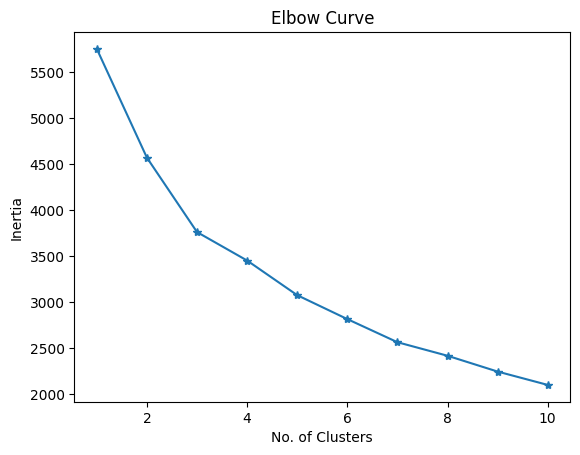

In [ ]:
from sklearn.cluster import KMeans,AgglomerativeClustering
# Elbow Method...
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters= i,random_state=42)
  km.fit_predict(scaled_data)
  wcss.append(km.inertia_) # append all the [wcss] values for every cluster (1 to 10)

# plot the elbow curve...
plt.plot(range(1,11),wcss,marker='*')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

### ✅Step 5: **Applying KMeans on optimal k-value**

In [ ]:
# applying KMeans on optimal k-value...
kmean = KMeans(n_clusters=3,random_state=42)
labels = kmean.fit_predict(scaled_data)

In [ ]:
# Creating a cluster column in cust_profile...
df['Cluster'] = kmean.fit_predict(scaled_data)

### ✅Step 6: **Analyze Clusters**

In [ ]:
df.groupby('Cluster')[['Age', 'Gender', 'AverageSpend','PurchaseFrequency','Recency']].mean()

,Age,Gender,AverageSpend,PurchaseFrequency,Recency
Cluster,,,,,
0,37.173913,1.00000,130.412967,1.255754,216.586113
1,37.691489,0.43617,257.530106,1.209220,760.518004
2,39.251572,0.00000,115.472851,1.115304,193.552692


### ✅Step 7: **Recommendation Function**

In [ ]:
# Find segment of the given customer...
def cust_segment(CustomerID):
  return df[df['CustomerID'] == CustomerID]['Cluster'].iloc[0]

In [ ]:
# Get top 5 products...
def kmean_recomm(CustomerID):
  segment = cust_segment(CustomerID)  # call the cust_segment function...
  seg_data = df[df['Cluster']==segment] # Taking the data which belong to the given 'cluster'
  top_prod = (seg_data.groupby(['ProductID','Product','Description']).agg({'QuantityBought':'sum'})
             .sort_values(by='QuantityBought',ascending=False).head(5).reset_index()
             )
  return top_prod[['ProductID','Product','Description']]


### ✅Step 8: **Get the recommendations (Testing)**

In [ ]:
kmean_recomm(17349)  # Geometric Wall Shelf

,ProductID,Product,Description
0,1824,Water Bottle,A BPA-free reusable bottle designed to keep dr...
1,9357,Bluetooth Speaker,A portable Bluetooth speaker with clear sound ...
2,7446,LED Light Strip,A flexible RGB LED strip with multiple color m...
3,7430,Desk Organizer,A multi-section organizer that keeps workspace...
4,7212,Storage Box,A sturdy plastic storage box ideal for organiz...


In [ ]:
kmean_recomm(93597)  # Ceramic Mug

,ProductID,Product,Description
0,9984,Home Decor Lamp,A warm ambient lamp with soft diffused lightin...
1,9901,Bluetooth Speaker,A portable Bluetooth speaker with clear sound ...
2,9041,Desk Organizer,A multi-section organizer that keeps workspace...
3,8848,Wireless Mouse,A lightweight wireless mouse with ergonomic de...
4,1891,Wall Clock,A minimalist wall clock with a silent sweep me...


# 2️⃣**Content-Based Recommendation (Based on Product Info)**

## ✔Steps Include...
* Crate a 'product features' column by taking all the product features
* Apply TfidfVectorizer on 'product features'
* Apply Cosine similarity
* Create a Recomm. function
* Use the function [Testing]
* Check the accuracy/performance

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### ✅Step 1: **Taking all the product features**

In [ ]:
df['product_features'] = (
    df['Product'].astype(str) + " " +
    df['Category_x'].astype(str) + " " +
    df['Country'].astype(str) + " " +
    df['Price'].astype(str) + " " +
    df['Description'].astype(str) + " " +
    df['PurchaseFrequency'].astype(str)
)

### ✅Step 2: **Apply tfidfvectorizer**

In [ ]:
tf = TfidfVectorizer(stop_words='english')  # It converts text into numerical vectors
contect_tfidf_matrix = tf.fit_transform(df['product_features'])

### ✅Step 3: **Apply Cosine similarity**

In [ ]:
similarity_matrix = cosine_similarity(contect_tfidf_matrix, contect_tfidf_matrix) # where [raws =products], [columns= produts], [values = similarity_scores]

### ✅Step 4: **Create Recommendation func.**

In [ ]:
def recommend_by_product_id(product_id, n=5):
    if product_id not in df['ProductID'].values:  # To avoid error...if a wrong product id is entered...
        return ["Product ID not found"]

    idx = df[df['ProductID'] == product_id].index[0] # converting product id into row index...to find out the raw no. of the given product-id...

    # similarity scores
    sim_scores = list(enumerate(similarity_matrix[idx]))# similarity_matrix[idx]: to finding the raw for the given product in similarity_matrix...
    # enumerate: Store the all simila_scores into a list with (simi_score & product_index) in a tuple...

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) # Sorting based on key x[1] means simil_score not prod_index...
    # [reverse = True] means Highest to lowest...

    # skip the first (same product)
    sim_scores = sim_scores[1:] # is similarity is 1 means same product..so ignore it...

    # store unique product names
    recommendations = []
    seen_products = set()  # Avoid duplicates product name...for better recommendations...

    for i in sim_scores:
        pid = df.iloc[i[0]]['ProductID']
        pname = df.iloc[i[0]]['Product']

        # Avoid duplicates
        if pname not in seen_products:
            recommendations.append({"ProductID": pid, "Product": pname})
            seen_products.add(pname)

        # Stop after N unique products(5)
        if len(recommendations) == n:
            break

    return recommendations

### ✅Step 5: **Use the func. [Testing]**

In [ ]:
recommend_by_product_id(87037) # Motion Sensor Night Light

[{'ProductID': np.int64(92631), 'Product': 'Motion Sensor Night Light'},
 {'ProductID': np.int64(16626), 'Product': 'Blue-Light Blocking Glasses'},
 {'ProductID': np.int64(8511), 'Product': 'LED Light Strip'},
 {'ProductID': np.int64(3180), 'Product': 'Wall Clock'},
 {'ProductID': np.int64(5892), 'Product': 'Ceramic Mug'}]

In [ ]:
recommend_by_product_id(9152)  # Storage box

[{'ProductID': np.int64(3116), 'Product': 'Storage Box'},
 {'ProductID': np.int64(8291), 'Product': 'Notebook'},
 {'ProductID': np.int64(7371), 'Product': 'Desk Organizer'},
 {'ProductID': np.int64(9195), 'Product': 'Water Bottle'},
 {'ProductID': np.int64(6757), 'Product': 'Bluetooth Speaker'}]

In [ ]:
recommend_by_product_id(66968) # Rotating Desk Pen Holder

[{'ProductID': np.int64(57854), 'Product': 'Rotating Desk Pen Holder'},
 {'ProductID': np.int64(3365), 'Product': 'Desk Organizer'},
 {'ProductID': np.int64(4020), 'Product': 'Notebook'},
 {'ProductID': np.int64(7376), 'Product': 'Wireless Mouse'},
 {'ProductID': np.int64(7540), 'Product': 'Wall Clock'}]

# 3️⃣**Category Based Recommendation function**
### ✔Steps Include...
* Find the category of the given product
* Filter all the products from the similar category
* Remove the original one...[given product]
* Recommend 5 or 3 products from similar category

### ✅Step 1: **Combine the product details...**

In [ ]:
df['text_features'] = (
    df['Product'].astype(str) + " " +
    df['Description'].astype(str) + " " +
    df['Category_x'].astype(str)
)

### ✅Step 2: **Apply TfidfVectorizer...**

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text_features'])

### ✅Step 3: **Cosine similarity**

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)

### ✅Step 4: **Recomendation function**

In [ ]:
def recommend_products_category(product_input, n=5):

    # Determine whether input is ProductID or Product name
    if str(product_input).isdigit():
        idx_list = df.index[df['ProductID'] == int(product_input)].tolist()
    else:
        idx_list = df.index[df['Product'].str.lower() == str(product_input).lower()].tolist()

    # If product not found
    if len(idx_list) == 0:
        return f"Product '{product_input}' not found!"

    idx = idx_list[0]

    # Get category of input product
    category = df.loc[idx, 'Category_x']

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Store unique recommended products
    recommended = []
    added_products = set()   # prevent duplicates

    for i, score in sim_scores:
        if len(recommended) == n:
            break

        if i == idx:
            continue  # skip same product

        # Check same category
        if df.loc[i, 'Category_x'] == category:

            product_name = df.loc[i, 'Product']

            # Prevent duplicate names
            if product_name not in added_products:
                recommended.append(i)
                added_products.add(product_name)

    # Return selected recommendations
    return df[['ProductID', 'Product', 'Category_x']].iloc[recommended]

### ✅Step 5: **Testing**

In [ ]:
recommend_products_category(3143)

,ProductID,Product,Category_x
13,5300,Notebook,Office
1010,71673,Rotating Desk Pen Holder,Office
4,7327,Desk Organizer,Office
1063,20371,Wireless Number Pad,Office
1066,16626,Blue-Light Blocking Glasses,Office


In [ ]:
recommend_products_category('Bluetooth Speaker')

,ProductID,Product,Category_x
15,4818,Bluetooth Speaker,Electronics
1003,97379,"Portable Power Bank (10,000 mAh)",Electronics
24,8687,Wireless Mouse,Electronics


In [ ]:
recommend_products_category('Digital Kitchen Scale')

,ProductID,Product,Category_x
1005,84485,Digital Kitchen Scale,Kitchen
1024,20675,Reusable Metal Straw Kit,Kitchen
25,9472,Water Bottle,Kitchen
1,5892,Ceramic Mug,Kitchen
1043,72894,Silicone Baking Mat Set,Kitchen


# ⭐**Evaluation Part**⭐

## 1️⃣**Evaluate KMeans Model**
* Using Sill. score

In [ ]:
# Check the sill. score...
from sklearn.metrics import silhouette_score
print("Sill. score on k-value= 3: ",silhouette_score(scaled_data,km.labels_))

Sill. score on k-value= 3:  0.2212663645909646


### ✔Conclusion:
* ***Sill. score is around 0.22 on k-value = 3 ...Means good clustering.***

## 2️⃣**Evaluate content based model**
* Using similarity score

In [ ]:
def evaluate_model():
    scores = []  # To collect all the values in a list...

    for pid in df['ProductID'].unique()[:200]:  # loop for 200 product ids...
        recs = recommend_by_product_id(pid, n=5) # get the recomm. for each product...by calling our recomm. fu

        # get similarity scores of the 5 recommendations
        idx = df[df['ProductID']==pid].index[0]
        rec_indexes = [df[df['Product']==r['Product']].index[0] for r in recs]

        for ridx in rec_indexes:
            scores.append(similarity_matrix[idx][ridx])

    return np.mean(scores)

In [ ]:
print("Average Recommendation Similarity Score:", evaluate_model())

Average Recommendation Similarity: 0.16349493499800313


## ✔Conclusion:
* ***Average Recommendation Similarity: 0.163 means not too good***

## 3️⃣**Evaluate Category based model**
* Using precision@K ,[where k=5]

In [ ]:
def evaluate_precision_at_k(df, cosine_sim, k=5):
    correct = 0
    total = 0

    for idx in range(len(df)):
        product_name = df.loc[idx, 'Product']
        category = df.loc[idx, 'Category_x']

        # get top-k recommendations
        recommendations = recommend_products_category(product_name,n=k)

        # count relevant (same category)
        relevant = recommendations[recommendations['Category_x'] == category]

        correct += len(relevant)
        total += k

    precision = correct / total
    return precision

In [ ]:
precision_5 = evaluate_precision_at_k(df, cosine_sim, k=5)
print("Precision@5:", precision_5)

Precision@5: 0.8570434782608696


## ✔Conclusion:
* ***Precision@5 is arround 85%...means very good Model👍😃***

# **⭐Saving df, model, cosine_similarity matrix⭐**

In [ ]:
df.to_csv('Product_df.csv',index=False)  # Save the df

In [ ]:
import pickle # save the model
with open('tfidf_model.pkl','wb') as f:
  pickle.dump(tfidf_matrix,f)

In [ ]:
with open('cosine_sim.pkl','wb')as f:
  pickle.dump(cosine_sim,f)

# **⭐Streamlit app⭐**
* Using Vs-code

## ✅ **Import all the needed libraries**

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import os

## ✅**Create a function to load the df, model, cosine_similarity_matrix**

In [ ]:
@st.cache_resource
def load_data():
    df = pd.read_csv('Product_df.csv') # Load the df...

    # Load the tfidf_matrix...
    with open('tfidf_model.pkl','rb') as f:
        tfidf_matrix = pickle.load(f)

    # Load the cosine_matrix...
    with open('cosine_sim.pkl','rb') as f:
        cosine_sim = pickle.load(f)

    return df, tfidf_matrix, cosine_sim

df, tfidf_matrix, cosine_sim = load_data() # store the return values...

## ✅**Create a Dictonary for all the unique products with their images**

In [ ]:
# Dictonary for {Product:images}...
product_images = {
    'Wall Clock': 'clock.jpg',
    'Ceramic Mug': 'mug.jpg',
    'Desk Organizer': 'Desk Organizer.jpg',
    'Home Decor Lamp': 'home decor lamps.jpg',
    'Storage Box': 'storage new.jpg',
    'Bluetooth Speaker': 'Bluetooth Speaker.jpg',
    'LED Light Strip': 'Led light strip.jpg',
    'Notebook': 'notebook new.jpg',
    'Wireless Mouse': 'wireless mouse.jpg',
    'Water Bottle': 'Water Bottle.jpg',
    'Color-Changing Aroma Lamp': 'Color-Changing Aroma Lamp.jpg',
    'Digital Kitchen Scale': 'Digital Kitchen Scale.jpg',
    'Solar Garden Fairy Lights': 'solar garden fairy lights.jpg',
    'Portable Power Bank (10,000 mAh)': 'Portable Power Bank.jpg',
    'Under-Bed Storage Bag': 'bad_storage.jpg',
    'Geometric Wall Shelf': 'geoGeometric Wall Shelf.jpg',
    'Decorative Hourglass Timer': 'hour glass.jpg',
    'Rotating Desk Pen Holder': 'Rotating Desk Pen Holder.jpg',
    'Fragrance Oil Diffuser': 'Fragrance Oil Diffuser.jpg',
    'Motion Sensor Night Light': 'Motion Sensor Night Light.jpg',
    'Reusable Metal Straw Kit': 'Reusable Metal Straw Kit.jpg',
    'Hanging Closet Organizer': 'Hanging Closet Organizer.jpg',
    'Silicone Baking Mat Set': 'Silicone Baking Mat Set.jpg',
    'Wireless Number Pad': 'Wireless Number Pad.jpg',
    'Blue-Light Blocking Glasses': 'Light Blocking Glasses.jpg'
}

## ✅ **Create a function for image loading**

In [ ]:
# Create a function for image loading...
def image_loader(product_name):
    path = product_images.get(product_name,'images/default.jpg')
    return path if os.path.exists(path) else 'images/default.jpg'

## ✅**Create a price_df for Avg.price of all the uique products**

In [ ]:
# Create a price_df for unique products...
price_df = (df.groupby('Product')['Price'].mean().reset_index()) # Avg. price...

## ✅ **App making code**

In [ ]:
st.sidebar.title('Nevigation📌') # To select any option...
menu = st.sidebar.radio("Select Option",['Product Recommendation','Trending Produts','ProductPrice']) # Options...

# 1. if Product Recommendation selected...
if menu == 'Product Recommendation':
    st.title('Product Recommendation Dashboard💫🔍')
    st.image('recommendation.png',use_container_width=False)
    st.subheader('Enhance your shopping experience with recommended produts💖')

    # Dropdown for product selection...
    prod_list = df['Product'].unique() # to get all the unique product names...
    selected_prod = st.selectbox("Select a product here👇",prod_list) # store the selected product...
    # Get the recommendations...
    if st.button('Recommend'):
        recomm = recommend_products_category(selected_prod) # call the recommendation function...
        # [recomm] is a df which contains ProductID, Product, Category for recommended products...
        st.subheader('Top Recommended products⭐⭐⭐⭐⭐')

        for _, row in recomm.iterrows(): # Loops through each row in recomm and (_) ignores the index...
            with st.container(): # each recomm. product appears as a seperate block...
                col1, col2, = st.columns([1,3]) # creating two columns...
                with col1: # col1 is narrow for image...
                    img_path = image_loader(row["Product"]) # get the image path for each recomm. product
                    # if image exists...
                    if os.path.exists(img_path):
                        st.image(img_path,width=100)
                    else:
                        st.image('images/default.jpg',width=100) # if image is missing...
                with col2: # col2 is wide for product details...
                    st.subheader(row['Product'])
                    st.write(f'Category: {row['Category_x']}')
            st.divider() # To add a horizontal line for separate each recom. product...

    # 2. if Trending products selected...
elif menu == 'Trending Produts':
    st.title("Trending Products are here🔥")
    st.image('tranding products.webp',use_container_width=False)# Image after title...
    trending_prod = (df.sort_values('Recency').drop_duplicates(subset=['Product']).head(10))# sorting top diff. products based on Recency...
    # loop in trending_prod...
    for _, row in trending_prod.iterrows():
        col1, col2 = st.columns([1,3])
        with col1:
            img_path = image_loader(row["Product"])
            if os.path.exists(img_path):
                st.image(img_path,width=100)
        with col2:
            st.subheader(row['Product'])
            st.write(f'Category: {row['Category_x']}')
            st.write(f'Price: {row['Price']}')
        st.divider()

 # 3. if menu=='Product Price'
else:
    st.title('Product price page💰')
    st.subheader("Know the average,get the best spot of price🤗✨")
    for _, row in price_df.iterrows():
        col1, col2 = st.columns([1,4])
        with col1:
            img = image_loader(row['Product'])
            st.image(img,width=140)
        with col2:
            st.subheader(row['Product'])
            st.write(f'Price: {round(row['Price'],2)}')
        st.divider()

In [ ]:
# Run the command in terminal to run your streamlit...
streamlit run app.py

# ⭐**Deployment**⭐
* Using Render
## ✔**Steps include**
* Create a requirements.txt in vs code which contains all the libraries used in streamlit.
* Create a git repo. and upload all the files (df, model, matrix, images, requirements.txt, app.py)
* Copy this URL:
https://github.com/shireeen22/Product-recommendation-app.git
* Paste the above URL into Render➡ Web service➡ Public git repository➡ Connect
➡ Deploy
* Live Product recommendation app URL:
https://product-recommendation-app-new.onrender.com


# **End of the Project** 🔚

# **ThankYou💖**